## Question 1

In [15]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = X = pd.read_csv('stockReturns1.csv',header= None)
df
#df = pd.read_excel('peerToPeerLoans.xlsx',header= None)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreadentamaro/Desktop/COMP0050CourseworkData/peerToPeerLoans.xlsx'

In [13]:
df=df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,6.0,2500,36,83.03,0,MORTGAGE,Source Verified,2014-12-01 00:00:00,home_improvement,13.77,...,0,94.3,32,Individual,5,0,4.949395,687,4.360006,0
2,14.0,6000,36,194.99,10,MORTGAGE,Not Verified,2014-12-01 00:00:00,home_improvement,6.87,...,0,82.6,48,Individual,5,0,5.079185,662,4.695718,0
3,16.0,3000,36,97.5,9,RENT,Not Verified,2014-12-01 00:00:00,medical,9.54,...,0,42.6,18,Individual,0,0,4.778158,682,3.693463,0
5,27.0,18450,36,633.36,10,MORTGAGE,Not Verified,2014-12-01 00:00:00,home_improvement,23.37,...,0,87,20,Individual,2,0,5.033428,682,3.772762,1
6,41.0,5675,36,189.56,2,RENT,Source Verified,2014-12-01 00:00:00,car,15.55,...,0,15,15,Individual,0,0,4.698979,697,3.464936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76168,1646678.0,19000,60,583.7,10,MORTGAGE,Verified,2016-01-01 00:00:00,home_improvement,3.91,...,0,49.7,8,Individual,1,0,4.698979,687,3.655331,0
76169,1646688.0,20000,36,637.58,5,OWN,Source Verified,2016-01-01 00:00:00,home_improvement,12.8,...,0,56.9,23,Individual,2,0,4.986776,717,3.876045,0
76170,1646699.0,24000,36,781.65,0,MORTGAGE,Not Verified,2016-01-01 00:00:00,home_improvement,2.18,...,2,33.7,28,Individual,10,0,5.176094,702,4.107176,0
76171,1646737.0,7225,36,237.3,10,MORTGAGE,Source Verified,2016-01-01 00:00:00,home_improvement,14.44,...,0,76.3,15,Individual,2,0,4.740371,692,4.399916,1


In [14]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['verification_status'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['purpose'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['application_type'])], axis=1)
df=df.drop(columns=['home_ownership','verification_status','application_type','purpose'])
df
df.to_excel(r'/Users/admin/Desktop/saved_file.xlsx',index=False)


KeyError: 'home_ownership'

In [ ]:


corr = df.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [10]:
#ANOVA  https://machinelearningmastery.com/feature-selection-with-numerical-input-data/


# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

 

def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    names = ['charged_off','Unnamed: 0','loan_amnt','term','installment','emp_length','dti','open_acc','pub_rec','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','log_annual_inc','fico_score','log_revol_bal','MORTGAGE','OWN','RENT','Not Verified','Source Verified','Verified','car','educational','home_improvement','medical','vacation','wedding','Individual','Joint App']
    data = pd.read_excel(r'/Users/admin/Desktop/saved_file.xlsx', names=names)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, 1:31]
    y = dataset[:,0]
    return X, y
 
    
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('saved_file.xlsx')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/admin/Desktop/saved_file.xlsx'

In [ ]:
data={'names':['Unnamed: 0','loan_amnt','term','installment','emp_length','dti',
               'open_acc','pub_rec','revol_util','total_acc','mort_acc','pub_rec_bankruptcies',
               'log_annual_inc','fico_score','log_revol_bal','MORTGAGE','OWN','RENT','Not Verified',
               'Source Verified',
               'Verified','car','educational','home_improvement','medical','vacation','wedding','Individual','Joint App']}
df2 = pd.DataFrame(data)
df2['scores']=fs.scores_
df2


In [ ]:
threshold = 150
df_features = df_features[df_features.scores>=150]
selected_features = np.array(df_features['features'])
selected_features

## ANN Model based on ANOVA feature selection


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# ANN model https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/
#Importing necessary Libraries

import numpy as np
import pandas as pd
import tensorflow as tf


data = pd.read_excel(r'/Users/andreadentamaro/Desktop/COMP0050CourseworkData/peerToPeerLoans.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreadentamaro/Desktop/COMP0050CourseworkData/peerToPeerLoans.xlsx'

In [140]:
#Generating Matrix of Features

import pandas as pd

import tensorflow as tf

from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values



In [141]:
#Splitting dataset into training and testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20) #random_state=1

In [142]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=128,activation="relu"))
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
# Use dropout to cut some connections and reduce overfitting
ann.add(tf.keras.layers.Dropout(0.5))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [144]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_train),Y_train)

#class_weights


w0=12788/(2*10361)
print(w0)


w1=12788/(2*2427)
print(w1)

0.6171218994305568
2.634528224145035


In [145]:
#Fitting ANN


history = ann.fit(X_train,Y_train,validation_data=(X_test, Y_test),  class_weight = {0:0.62, 1:2.63}, batch_size=32,epochs = 5)



Epoch 1/5
1599/1599 [==============================] - 5s 3ms/step - loss: 0.6368 - accuracy: 0.6300 - val_loss: 0.6135 - val_accuracy: 0.6261
Epoch 2/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6275 - accuracy: 0.6374 - val_loss: 0.6216 - val_accuracy: 0.6313
Epoch 3/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6256 - accuracy: 0.6425 - val_loss: 0.6224 - val_accuracy: 0.6439
Epoch 4/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.6401 - val_loss: 0.5931 - val_accuracy: 0.6660
Epoch 5/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6227 - accuracy: 0.6448 - val_loss: 0.6160 - val_accuracy: 0.6314


In [146]:
Y_pred = np.round_(ann.predict(X_test))
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[6431, 3998],
       [ 716, 1643]])

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

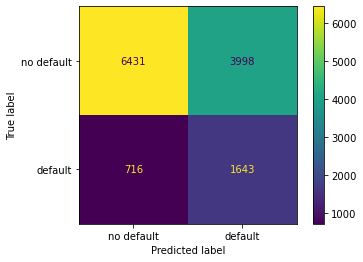

In [148]:
cm_vis = ConfusionMatrixDisplay(cm, display_labels=['no default','default'])
cm_vis.plot()
plt.show()

In [149]:
# Performance report including precision, recall, f1-score
print(classification_report(Y_test, Y_pred))
# combination of precition recall f1-score

              precision    recall  f1-score   support

           0       0.90      0.62      0.73     10429
           1       0.29      0.70      0.41      2359

    accuracy                           0.63     12788
   macro avg       0.60      0.66      0.57     12788
weighted avg       0.79      0.63      0.67     12788



In [151]:
print(np.count_nonzero(Y_test == 1))
print(np.count_nonzero(Y_test == 0))

len(Y)
52177/63940
52177/11763

2359
10429


4.435688174785344

In [152]:
len(Y_test)

12788

In [153]:
print(np.count_nonzero(Y_test == 1))
print(np.count_nonzero(Y_test == 0))
15705/3477

2359
10429


4.516824849007765

In [154]:
#history = ann.fit(X_train,Y_train,validation_data=(X_test, Y_test), verbose=1, 
                          #class_weight = {0:3.15, 1:0.59},  # class_weights for binary
#                          epochs=20)

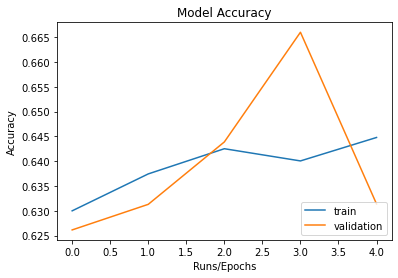

In [155]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.xlabel("Runs/Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

plot_hist(history)

## LR Model

In [1]:
# LR https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#read the dataset
#note that the csv file is space delimited

col_names = ['loan_amnt','term','installment','dti','open_acc','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','log_annual_inc','fico_score','log_revol_bal','MORTGAGE','OWN','RENT','Not Verified','Source Verified','Verified','charged_off',]
pima = pd.read_excel(r'/Users/admin/Desktop/saved_file1.xlsx', names=col_names)





In [2]:
pima.head()

,loan_amnt,term,installment,dti,open_acc,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,MORTGAGE,OWN,RENT,Not Verified,Source Verified,Verified,charged_off
0,2500,36,83.03,13.77,9,94.3,32,5,0,4.949395,687.0,4.360006,1,0,0,0,1,0,0
1,6000,36,194.99,6.87,11,82.6,48,5,0,5.079185,662.0,4.695718,1,0,0,1,0,0,0
2,3000,36,97.50,9.54,7,42.6,18,0,0,4.778158,682.0,3.693463,0,0,1,1,0,0,0
3,18450,36,633.36,23.37,11,87.0,20,2,0,5.033428,682.0,3.772762,1,0,0,1,0,0,1
4,5675,36,189.56,15.55,7,15.0,15,0,0,4.698979,697.0,3.464936,0,0,1,0,1,0,0


In [5]:
#split dataset in features and target variable
feature_cols = ['loan_amnt','term','installment','dti','open_acc','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','log_annual_inc','fico_score','log_revol_bal','MORTGAGE','OWN','RENT','Not Verified','Source Verified','Verified','charged_off']

#X = pima.iloc[:, 1:19].values
#y = pima.iloc[:,0].values
X = pima.iloc[:,1:-1].values
y = pima.iloc[:,-1].values
#X = pima[feature_cols] # Features
#y = pima.charged_off # Target variable

In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [16]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [18]:
# import the metrics class - confusion matrix evaluation

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15588,   117],
       [ 3317,   160]])

In [19]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 257.44, 'Predicted label')

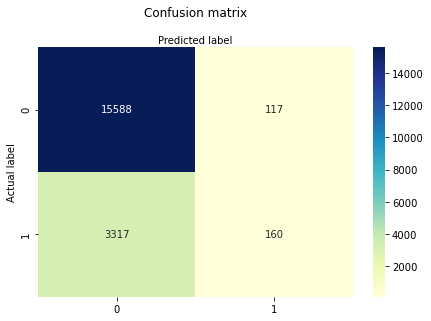

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# Performance report including precision, recall, f1-score
print(classification_report(y_test, y_pred))
# combination of precition recall f1-score

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     15705
           1       0.58      0.05      0.09      3477

    accuracy                           0.82     19182
   macro avg       0.70      0.52      0.49     19182
weighted avg       0.78      0.82      0.75     19182



In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8209780002085288
Precision: 0.5776173285198556
Recall: 0.0460166810468795


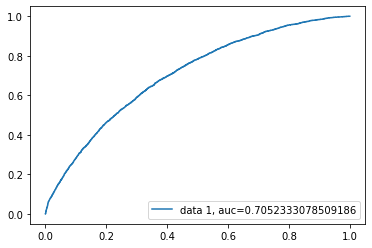

In [23]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Question 2